In [17]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
import random
import pandas as pd
import numpy as np 
from numpy import genfromtxt
from matplotlib import animation
import random 



In [25]:

# def generate_colors(n): 
#     rgb_values = [] 
#     hex_values = [] 
#     r = int(random.random() * 256) 
#     g = int(random.random() * 256) 
#     b = int(random.random() * 256) 
#     step = 256 / n 
#     for _ in range(n): 
#         r += step 
#         g += step 
#         b += step 
#         r = int(r) % 256 
#         g = int(g) % 256 
#         b = int(b) % 256 
#         r_hex = hex(r)[2:] 
#         g_hex = hex(g)[2:] 
#         b_hex = hex(b)[2:] 
#         hex_values.append('#' + r_hex + g_hex + b_hex) 
#         rgb_values.append((r,g,b)) 
#     return rgb_values, hex_values 
    
# # generate values and print them 
# rgb_values, hex_values = generate_colors(1) 


['#92df8', '#9d183', '#a823e', '#b32e19', '#be3924', '#c9442f', '#d44f3a', '#df5a45', '#ea6550', '#f5705b', '#07b66', '#b8671', '#16917c', '#219c87', '#2ca792', '#37b29d', '#42bda8', '#4dc8b3', '#58d3be', '#63dec9', '#6ee9d4', '#79f4df', '#84ffea']


In [26]:

f = "/home/kepler42/EE494/EE494/merged.csv"
df = pd.read_csv(f,sep=',')
print(df)

      Unnamed: 0      0    1   2   3   4
0              0    0.0  500 -41 -45 -55
1              1    0.0  500 -41 -45 -57
2              2    0.0  500 -41 -43 -55
3              3    0.0  500 -45 -43 -57
4              4    0.0  500 -45 -43 -55
...          ...    ...  ...  ..  ..  ..
5745        5745  327.0  731 -41 -47 -45
5746        5746  327.0  731 -41 -47 -45
5747        5747  327.0  731 -41 -45 -45
5748        5748  327.0  731 -39 -45 -47
5749        5749  327.0  731 -41 -47 -45

[5750 rows x 6 columns]


In [27]:

df["x_y"] = (df["0"].apply(str) + df["1"].apply(str)).astype("string")
df

,Unnamed: 0,0,1,2,3,4,x_y
0,0,0.0,500,-41,-45,-55,0.0500
1,1,0.0,500,-41,-45,-57,0.0500
2,2,0.0,500,-41,-43,-55,0.0500
3,3,0.0,500,-45,-43,-57,0.0500
4,4,0.0,500,-45,-43,-55,0.0500
...,...,...,...,...,...,...,...
5745,5745,327.0,731,-41,-47,-45,327.0731
5746,5746,327.0,731,-41,-47,-45,327.0731
5747,5747,327.0,731,-41,-45,-45,327.0731
5748,5748,327.0,731,-39,-45,-47,327.0731


In [28]:
unique = df.x_y.unique()

In [32]:
#df['c'] = df.x_y.map({0:colors[0], 1:colors[1], 2:colors[2]})
colors = {}
for i,j in enumerate(unique):
    colors[j] = i+2
print(colors)

{'0.0500': 2, '90.0500': 3, '0.0375': 4, '0.0250': 5, '200.5625': 6, '187.1125': 7, '90.0731': 8, '200.5250': 9, '0.0125': 10, '157.50': 11, '250.5375': 12, '200.5375': 13, '284.0500': 14, '90.0625': 15, '90.0125': 16, '90.0250': 17, '90.00': 18, '316.6625': 19, '90.0375': 20, '200.5731': 21, '200.5500': 22, '0.00': 23, '327.0731': 24}


In [33]:
df['c']=df['x_y'].map(colors)
df

,Unnamed: 0,0,1,2,3,4,x_y,c
0,0,0.0,500,-41,-45,-55,0.0500,2
1,1,0.0,500,-41,-45,-57,0.0500,2
2,2,0.0,500,-41,-43,-55,0.0500,2
3,3,0.0,500,-45,-43,-57,0.0500,2
4,4,0.0,500,-45,-43,-55,0.0500,2
...,...,...,...,...,...,...,...,...
5745,5745,327.0,731,-41,-47,-45,327.0731,24
5746,5746,327.0,731,-41,-47,-45,327.0731,24
5747,5747,327.0,731,-41,-45,-45,327.0731,24
5748,5748,327.0,731,-39,-45,-47,327.0731,24


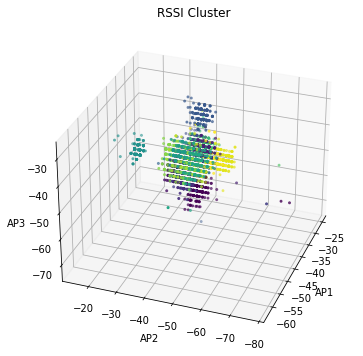

In [22]:

def rotate(angle):
    ax.view_init(azim=angle)

fig = pyplot.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')

ax.scatter(df['2'], df['3'], df['4'],c=df.c, s =4)
ax.set_title('RSSI Cluster')
ax.set_xlabel('AP1')
ax.set_ylabel('AP2')
ax.set_zlabel('AP3')

ax.view_init(azim=200)
pyplot.show()



In [ ]:
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)
rot_animation.save("/home/kepler42/EE494/EE494/rotation.gif", dpi=80, writer='imagemagick')